In [1]:
import pickle
import pandas as pd
import glob as gl
import seaborn as sns

In [25]:
AllData = pickle.load(open("./AllAUCsData.pk","rb"))
ToKeep = ["IT","name","inputsize","LS","lr","RandomLabel","MaxLoss","batch_size","beta1","beta2",]

    #break

In [26]:
AllData["Exp_64_256_0.000001__999"].keys()

dict_keys(['LS', 'batch_size', 'beta1', 'beta2', 'MaxLoss', 'lr', 'name', 'inputsize', 'RandomLabel', 'IT', 'RecLoss_MNIST_AUC', 'RecLoss_OXray_AUC', 'RecLoss_HFlip_AUC', 'RecLoss_VFlip_AUC', 'RecLoss_Shuffle_AUC', 'Dis_MNIST_AUC', 'Dis_OXray_AUC', 'Dis_HFlip_AUC', 'Dis_VFlip_AUC', 'Dis_Shuffle_AUC', 'Distance_MNIST_AUC', 'Distance_OXray_AUC', 'Distance_HFlip_AUC', 'Distance_VFlip_AUC', 'Distance_Shuffle_AUC', 'Zscore_MNIST_AUC', 'Zscore_OXray_AUC', 'Zscore_HFlip_AUC', 'Zscore_VFlip_AUC', 'Zscore_Shuffle_AUC'])

In [39]:
subdf = pd.DataFrame(AllData).transpose()
AUCcol = list(subdf.filter(regex="AUC").columns)
subdf[AUCcol] = subdf[AUCcol].apply(pd.to_numeric)
numer = ["LS","lr","IT"]
subdf[numer] = subdf[numer].apply(pd.to_numeric)

subdf = subdf.dropna()


In [40]:
subdf.columns

Index(['Dis_HFlip_AUC', 'Dis_MNIST_AUC', 'Dis_OXray_AUC', 'Dis_Shuffle_AUC',
       'Dis_VFlip_AUC', 'Distance_HFlip_AUC', 'Distance_MNIST_AUC',
       'Distance_OXray_AUC', 'Distance_Shuffle_AUC', 'Distance_VFlip_AUC',
       'IT', 'LS', 'MaxLoss', 'RandomLabel', 'RecLoss_HFlip_AUC',
       'RecLoss_MNIST_AUC', 'RecLoss_OXray_AUC', 'RecLoss_Shuffle_AUC',
       'RecLoss_VFlip_AUC', 'Zscore_HFlip_AUC', 'Zscore_MNIST_AUC',
       'Zscore_OXray_AUC', 'Zscore_Shuffle_AUC', 'Zscore_VFlip_AUC',
       'batch_size', 'beta1', 'beta2', 'inputsize', 'lr', 'name'],
      dtype='object')

In [41]:
ToPrint = ToKeep+["IT"]+AUCcol

In [42]:
for metric in ["Dis","Distance","RecLoss","Zscore"]:
    subdf[metric+"_mean"] = list(subdf.dropna().filter(regex=metric+"_").mean(axis=1))
    

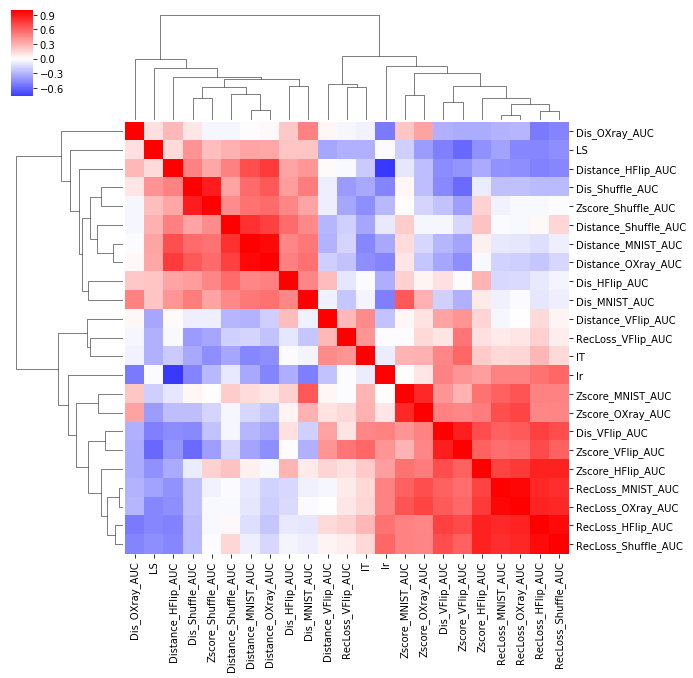

In [43]:
sns.clustermap(subdf[AUCcol+numer].corr(),center=0,cmap="bwr")

In [32]:
MaxAUCind = subdf.filter(regex="mean").max(axis=1).sort_values(ascending = False).index



In [33]:
subdf.loc[MaxAUCind].filter(regex="mean")

,Dis_mean,Distance_mean,RecLoss_mean,Zscore_mean
Exp_64_64_0.000001__4.0,0.649897,0.848666,0.902691,0.862364
Exp_64_128_0.000001_RandomLabel_4.0,0.603690,0.865542,0.902206,0.832925
Exp_64_512_0.00001_RandomLabel_4.0,0.666370,0.778720,0.901879,0.860910
Exp_64_512_0.00001_RandomLabel_999,0.814648,0.703357,0.900815,0.888533
Exp_64_64_0.000001_RandomLabel_999,0.785232,0.873416,0.890799,0.900796
Exp_64_128_0.000001__4.0,0.798478,0.208046,0.848181,0.898767
Exp_64_64_0.000001_RandomLabel_4.0,0.671666,0.876361,0.896691,0.898505
Exp_64_256_0.00001__999,0.428561,0.750809,0.898382,0.807245
Exp_64_128_0.00001__4.0,0.396733,0.454155,0.891745,0.810969
Exp_64_64_0.00001__4.0,0.560935,0.617576,0.887771,0.846408


In [34]:
subdf.loc[MaxAUCind][AUCcol].filter(regex="Dis_")

,Dis_HFlip_AUC,Dis_MNIST_AUC,Dis_OXray_AUC,Dis_Shuffle_AUC,Dis_VFlip_AUC
Exp_64_64_0.000001__4.0,0.862285,0.690326,0.104407,0.997077,0.595391
Exp_64_128_0.000001_RandomLabel_4.0,0.947727,0.815418,0.638418,0.026054,0.590832
Exp_64_512_0.00001_RandomLabel_4.0,0.936156,0.641967,0.144302,0.999691,0.609733
Exp_64_512_0.00001_RandomLabel_999,0.975256,0.896392,0.671964,0.999995,0.529636
Exp_64_64_0.000001_RandomLabel_999,0.890383,0.849842,0.571933,0.999201,0.614801
Exp_64_128_0.000001__4.0,0.964642,0.727060,0.723321,0.999717,0.577648
Exp_64_64_0.000001_RandomLabel_4.0,0.816665,0.635456,0.373961,0.999001,0.533247
Exp_64_256_0.00001__999,0.874831,0.096023,0.068972,0.495090,0.607891
Exp_64_128_0.00001__4.0,0.953447,0.028123,0.373514,0.011158,0.617421
Exp_64_64_0.00001__4.0,0.861865,0.387668,0.604917,0.344047,0.606178


In [35]:
subdf.loc[MaxAUCind][AUCcol].filter(regex="Rec")

,RecLoss_HFlip_AUC,RecLoss_MNIST_AUC,RecLoss_OXray_AUC,RecLoss_Shuffle_AUC,RecLoss_VFlip_AUC
Exp_64_64_0.000001__4.0,0.990880,0.999852,0.995670,0.993705,0.533346
Exp_64_128_0.000001_RandomLabel_4.0,0.974925,0.998457,0.993792,0.983240,0.560618
Exp_64_512_0.00001_RandomLabel_4.0,0.979349,0.999995,0.998686,0.981443,0.549924
Exp_64_512_0.00001_RandomLabel_999,0.965291,1.000000,0.994422,0.997334,0.547027
Exp_64_64_0.000001_RandomLabel_999,0.974579,1.000000,0.997521,0.979101,0.502792
Exp_64_128_0.000001__4.0,0.889660,0.997994,0.972411,0.884352,0.496488
Exp_64_64_0.000001_RandomLabel_4.0,0.952709,0.998666,0.998086,0.976098,0.557897
Exp_64_256_0.00001__999,0.977457,1.000000,0.996255,0.996119,0.522078
Exp_64_128_0.00001__4.0,0.941533,1.000000,0.994615,0.999151,0.523428
Exp_64_64_0.00001__4.0,0.916065,1.000000,0.992736,0.992235,0.537819


In [36]:
subdf[param]

,LS,lr,RandomLabel,MaxLoss
Exp_64_256_0.000001__999,256,0.000001,False,999
Exp_64_64_0.00001_RandomLabel_4.0,64,0.000010,True,4
Exp_64_512_0.00001__4.0,512,0.000010,False,4
Exp_64_256_0.00001__999,256,0.000010,False,999
Exp_64_128_0.000001_RandomLabel_4.0,128,0.000001,True,4
Exp_64_512_0.00001_RandomLabel_999,512,0.000010,True,999
Exp_64_64_0.00001__999,64,0.000010,False,999
Exp_64_128_0.00001__4.0,128,0.000010,False,4
Exp_64_256_0.00001_RandomLabel_4.0,256,0.000010,True,4
Exp_64_128_0.000001__4.0,128,0.000001,False,4


In [ ]:
param = ["LS","lr","MaxLoss","RandomLabel","IT"]
meanauc = list(subdf.loc[MaxAUCind].filter(regex="RecLoss_mean").columns)
subdf.sort_values(by=param)[param+meanauc]



In [57]:
param = ["lr","LS","MaxLoss","RandomLabel","IT"]
meanauc = list(subdf.loc[MaxAUCind].filter(regex="RecLoss_mean").columns)
subdf.sort_values(by="RecLoss_mean",ascending=False)[param+meanauc]



,lr,LS,MaxLoss,RandomLabel,IT,RecLoss_mean
Exp_64_64_0.000001__4.0,0.000001,64,4,False,2545200,0.902691
Exp_64_128_0.000001_RandomLabel_4.0,0.000001,128,4,True,2121000,0.902206
Exp_64_512_0.00001_RandomLabel_4.0,0.000010,512,4,True,2121000,0.901879
Exp_64_512_0.00001_RandomLabel_999,0.000010,512,999,True,1060500,0.900815
Exp_64_256_0.00001__999,0.000010,256,999,False,1060500,0.898382
Exp_64_64_0.000001_RandomLabel_4.0,0.000001,64,4,True,1686700,0.896691
Exp_64_128_0.00001__4.0,0.000010,128,4,False,1646300,0.891745
Exp_64_64_0.000001_RandomLabel_999,0.000001,64,999,True,2121000,0.890799
Exp_64_64_0.00001__4.0,0.000010,64,4,False,1060500,0.887771
Exp_64_128_0.00001__999,0.000010,128,999,False,2121000,0.880622


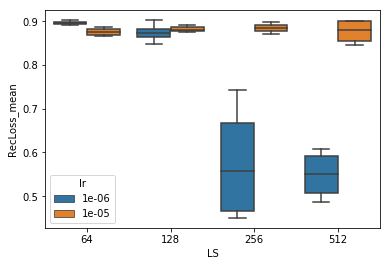

In [56]:
sns.boxplot(y="RecLoss_mean",x="LS",hue="lr",data=subdf)

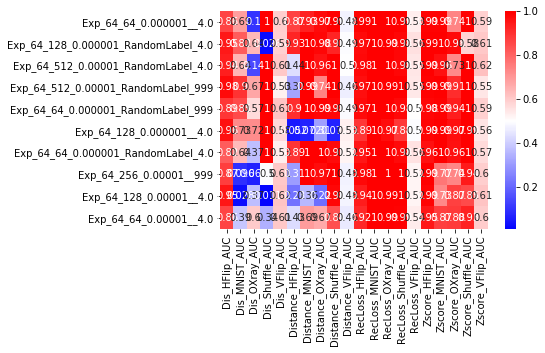

In [11]:
sns.heatmap(subdf.loc[MaxAUCind].head(10)[AUCcol],cmap="bwr",center=0.5,annot=True)

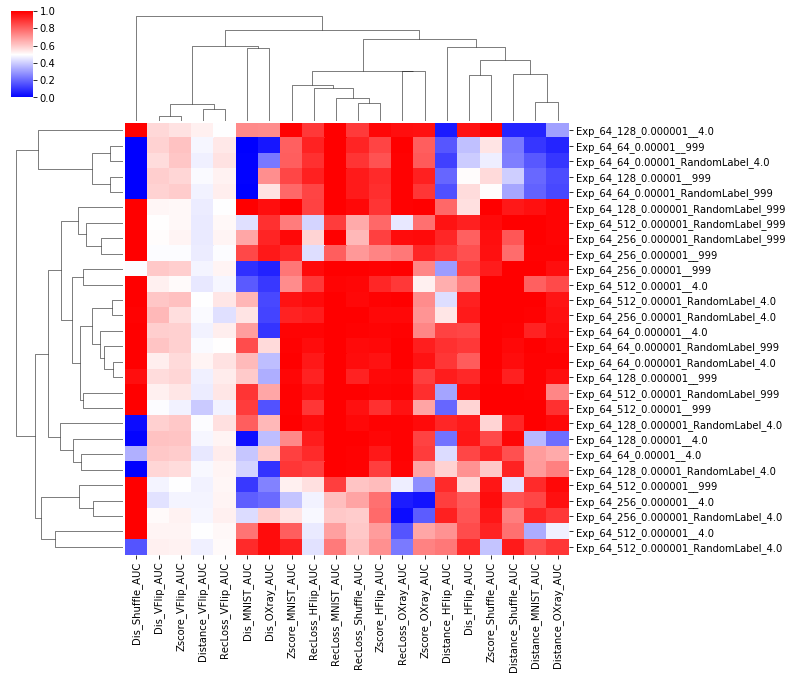

In [12]:
sns.clustermap(subdf.loc[MaxAUCind].filter(regex="AUC").dropna(),center=0.5,cmap = "bwr")

In [ ]:
sns.heatmap(subdf.loc[MaxAUCind].head(10)[AUCcol],cmap="bwr",center=0.5,annot=True)